### Data Loading

In [126]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px

# Loading the data
data = pd.read_csv("Billionaire.csv")

#Storing the data into a dataframe
df = pd.DataFrame(data)

# Printing out the first 5 rows of the data
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [127]:
df.tail()

,Name,NetWorth,Country,Source,Rank,Age,Industry
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified
2754,Zhou Wei family,$1 B,China,Software,2674,54.0,Technology


### Understanding and cleaning the dataset

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


##### The dataset has 2 types of datatypes that is the object and the numericals ( intergers and floats). It has 7 columns and 2754 data rows. 

In [129]:
# Tabulating the column names in tabular format
from tabulate import tabulate
col_names = df.columns.tolist()
col_names_table = [[i+1, name] for i, name in enumerate(col_names)] # i+1 is used to start the index from 1
print(tabulate(col_names_table, headers = ["index", "column name"]))


  index  column name
-------  -------------
      1  Name
      2  NetWorth
      3  Country
      4  Source
      5  Rank
      6  Age
      7  Industry


In [130]:
import warnings
warnings.filterwarnings('ignore')

# Check for missing values
df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [131]:
# Dropping all the rows with missing values in the specified columns
columns_to_check = ['Age']
df = df.dropna(subset=columns_to_check)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2676 non-null   object 
 1   NetWorth  2676 non-null   object 
 2   Country   2676 non-null   object 
 3   Source    2676 non-null   object 
 4   Rank      2676 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2676 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 167.2+ KB


In [132]:
# Clean the NetWorth column
df['NetWorth'] = df['NetWorth'].str.replace('[$B]', '', regex=True).astype(float)

# Verify the changes
print(df['NetWorth'].head())


0    177.0
1    151.0
2    150.0
3    124.0
4     97.0
Name: NetWorth, dtype: float64


In [133]:
# Checking for outliers using the IQR method
def detect_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include = ['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 +1.5*IQR

        outliers = df[(df[column]< lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return pd.Series(outlier_counts, name="NUmber of Outliers")

outliers = detect_outliers_iqr(df)
print("NUmber of OUtliers In Each Column:\n", outliers)


NUmber of OUtliers In Each Column:
 NetWorth    298
Rank          0
Age           4
Name: NUmber of Outliers, dtype: int64


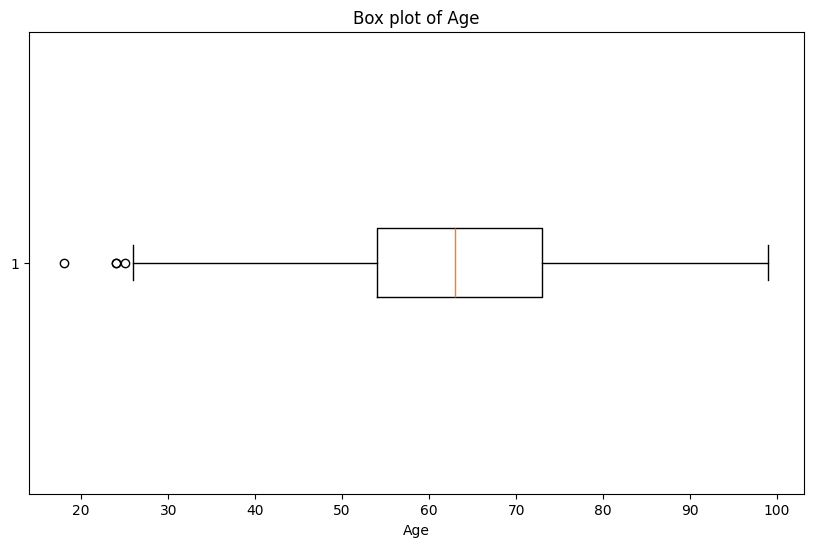

In [134]:
import matplotlib.pyplot as plt

# Creating a box plot for the 'Age' column to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

In [135]:
# Total Networth by Country
net_worth_by_country = df.groupby('Country')['NetWorth'].sum().reset_index().sort_values(by='NetWorth', ascending=False).head(20)
# Creating an interactive treeemap
fig = px.treemap(
    net_worth_by_country,
    path=['Country'],
    values='NetWorth',
    title='Total Net Worth by Country (Top 20)',
    labels={'NetWorth': 'Total Net Worth (in Billion USD)'}
)

fig.update_layout(
    template = 'plotly_white',
    width = 1500,
    height = 600
)
fig.show()

##### The treemap above shows the global distribution of billionaires wealth, with the United States dominating as a country with the highest total net worth, this reflects the country's strong economy, the thriving technology sector and robust financial markets. China follows closely as the second largest comtributor, driven by the rapid economic growth and wealth accumalation industries like technology, manufacturing and real estate. Countries such as Russia India and Germany also stand out in the list showing the influence of natural resources, engineering and technology as well. WHile smaller economies like Sweden, Singapore and Hong Kong have fewer billionaires, their presence is an indication of the notabvle contributins from the niche industries and global trade. Overall, billionaire wealth is highly concentrated in a few countries, reflecting economic disparities while highlighting the economic powerhouses shaping global wealth trends.

In [136]:
# Top 20 countries with most billionaires
top_countries = df['Country'].value_counts().head(20).reset_index()
top_countries.columns = ['Country', 'Number of Billionaires']
fig = px.bar(
    top_countries,
    x= 'Country',
    y = 'Number of Billionaires',
    text = 'Number of Billionaires',
    title = 'Top 20 Countries with most Billionaires',
    color = 'Number of Billionaires',
    labels = {'Number of Billionaires': 'Number of Billionaires'}
)

fig.update_traces(textposition = 'outside')
fig.update_layout(
    template = 'plotly_white',
    width = 1500,
    height = 500
)
fig.show()

##### This bar chart showcases the top 20 countries with the highest number of billionaires. The United States stands out significantly, with 720 billionaires, showcasing its dominance in wealth accumulation driven by industries such as technology, finance, and retail. China follows with 610 billionaires, highlighting its rapid economic growth and the emergence of wealth in sectors like technology and manufacturing. India ranks third with 134 billionaires, reflecting its growing economy and success in technology and pharmaceuticals. Other countries, such as Russia and Germany, maintain a notable billionaire presence due to strong natural resources and industrial sectors. The chart demonstrates that while wealth is concentrated in a few major economies, smaller nations also contribute significantly to the global billionaire count, indicating diverse opportunities for wealth creation across regions.

In [137]:
# Top Industries with most billionaires
top_industries = df['Industry'].value_counts().head(20).reset_index()
top_industries.columns = ['Industry', 'Number of Billionaires']
fig = px.bar(
    top_industries,
    x = 'Industry',
    y = 'Number of Billionaires',
    text = 'Number of Billionaires',
    color = 'Number of Billionaires',
    title = 'Top (20) countries with the most Billionaires',
    labels={'Number of Billionaires': 'Number of Billionaires'}
)

fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white', 
                  xaxis_tickangle=-45,
                  height = 500,
                  width = 1500)
fig.show()

##### The bar chart illustrates the distribution of billionaires across the top 20 industries, highlighting the dominance of Finance & Investments with 369 billionaires, followed closely by Technology with 355 billionaires. These two sectors underscore their role as wealth generators, driven by innovations, market growth, and global influence. Manufacturing ranks third with 317 billionaires, reflecting its historical role in wealth creation. Other prominent industries include Fashion & Retail (268 billionaires) and Healthcare (213 billionaires), showcasing the importance of consumer-driven and essential sectors. While industries like Energy (99 billionaires) and Media & Entertainment (92 billionaires) contribute significantly, sectors like Construction & Engineering and Sports maintain a smaller billionaire presence, likely due to specialized markets. The chart emphasizes the diverse avenues of wealth creation, with a clear concentration in sectors driven by innovation, investment, and consumer demand.

In [138]:
# Visualization of the AGe distribution of the billionaires age
age_distribution = df['Age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']
age_distribution = age_distribution.sort_values(by ='Age')
fig =px.line(
    age_distribution,
    x = 'Age',
    y = 'Count',
    title = 'Age Distribution of Billionaires',
    labels={'Age': 'Age', 'Count': 'Number of Billionaires'},
    markers = True
)

fig.update_layout(template = 'plotly_white',
                  width = 1500,
                  height = 500,
                  xaxis=dict(tickmode='linear'),
                  yaxis_title = 'Number of Billionaires')

fig.show()

##### The 2D line plot of the age distribution of billionaires reveals some interesting patterns. The number of billionaires starts to increase significantly around the age of 30, with a sharp rise peaking between the ages of 55 and 60. This indicates that most billionaires accumulate significant wealth during their middle age, likely due to career growth, business successes, or investments maturing. After age 60, the number of billionaires gradually declines, reflecting aging and possible wealth redistribution among heirs. The graph also shows a low frequency of very young (below 30) and very old (above 80) billionaires, suggesting that wealth accumulation typically takes time and is influenced by generational and lifecycle factors.

In [141]:
# Top 10 richest billionaires
top_richest = df.nlargest(20, 'NetWorth')[['Name', 'NetWorth']]

# Create interactive bar chart
fig = px.bar(
    top_richest,
    x='Name',
    y='NetWorth',
    title='Top 20 Richest Billionaires',
    text='NetWorth',
    color='NetWorth',
    labels={'NetWorth': 'Net Worth (in Billion USD)', 'Name': 'Billionaire'}
)

fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white', 
                  xaxis_tickangle=-45,
                  width = 1500,
                  height = 500)
fig.show()


In [145]:
# Scatter plot of Age vs Net Worth
fig = px.scatter(
    df,
    x='Age',
    y='NetWorth',
    title='Age vs. Net Worth of Billionaires',
    labels={'Age': 'Age', 'NetWorth': 'Net Worth (in Billion USD)'},
    color='Industry',
    hover_data=['Name']
)

fig.update_layout(template='plotly_white',
                  width = 1500,
                  height = 500)
fig.show()


In [146]:
# Top Sources of wealth for most billionaires
# Top Sources of Wealth
top_sources = df['Source'].value_counts().head(20).reset_index()
top_sources.columns = ['Source', 'Number of Billionaires']

# Create interactive bar chart
fig = px.bar(
    top_sources,
    x='Source',
    y='Number of Billionaires',
    title='Top Sources of Wealth (Top 20)',
    text='Number of Billionaires',
    color='Number of Billionaires',
    labels={'Source': 'Source of Wealth', 'Number of Billionaires': 'Number of Billionaires'}
)

fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white', xaxis_tickangle=-45)
fig.show()

In [81]:
import plotly.figure_factory as ff

# Calculate correlation matrix
correlation_matrix = df[['NetWorth', 'Rank', 'Age',]].corr()

# Create heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(title_text='Correlation Heatmap', template='plotly_white')
fig.show()


In [142]:
import pandas as pd
import plotly.figure_factory as ff

# Frequency encode categorical variables
encoded_df = df.copy()
encoded_df['Country'] = encoded_df['Country'].map(encoded_df['Country'].value_counts())
encoded_df['Source'] = encoded_df['Source'].map(encoded_df['Source'].value_counts())
encoded_df['Industry'] = encoded_df['Industry'].map(encoded_df['Industry'].value_counts())

# Calculate correlation matrix
correlation_matrix = encoded_df[['Country', 'Source', 'Industry']].corr()

# Create a heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(
    title_text='Correlation Heatmap: Country, Source, and Industry',
    template='plotly_white'
)
fig.show()
